# Exploratory Data Analysis on crime reports from Santa Clara County 

Goals:
1. Look at the trend of crime reports count since the beginning of 2020 till now
2. Build a model to predict crime reports count given the month, day and hour of the day

Strctures:
1. Get the datasource by calling the portal API
2. Explore the data and clean the data if necessary
3. Create plots
4. Build a model
5. Conclusions

Laugange: Python
Tools: Pandas, Numpy, Matplotlib.pyplot, Seaborn, Socrata, Skitlearn

Data Source: [Source](https://data.sccgov.org/Public-Safety/Crime-Reports/n9u6-aijz). Last Updated at July 28, 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
from sodapy import Socrata
# token, username and password 
client = Socrata("data.sccgov.org",
                 "token",
                 username="email",
                 password="password")

In [4]:
import itertools
items = client.get_all("n9u6-aijz") # this is the internal id of the report
limit_len = len(list(items))

In [5]:
results = client.get("n9u6-aijz",limit=limit_len)
df = pd.DataFrame.from_records(results)

In [6]:
df.head()

,case_number,incident_datetime,incident_description,address_1,city,state,parent_incident_type,incident_type_primary
0,S212090045,2021-07-28T05:08:31.000,Call Type: 1053 <br>Description: PERSON DOWN...,400 Block S BASCOM AV,Santa Clara County,CA,Other,PERSON DOWN
1,S212090044,2021-07-28T04:41:45.000,Call Type: 459 <br>Description: BURGLARY (4...,10300 Block STERLING BL,Santa Clara County,CA,Burglary,BURGLARY (460)
2,S212090042,2021-07-28T04:16:53.000,"Call Type: 1033A <br>Description: ALARM, AUDI...",1600 Block WHITHAM AV,Santa Clara County,CA,Alarm,"ALARM, AUDIBLE"
3,S212090031,2021-07-28T02:28:57.000,Call Type: 602 <br>Description: TRESPASSING...,2400 Block ENBORG LN,Santa Clara County,CA,Other,TRESPASSING
4,S212090029,2021-07-28T02:27:25.000,Call Type: 415M <br>Description: DISTURBANCE...,400 Block ARLETA AV,Santa Clara County,CA,Disorder,"DISTURBANCE, MUSIC"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141337 entries, 0 to 141336
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   case_number            141337 non-null  object
 1   incident_datetime      141326 non-null  object
 2   incident_description   141312 non-null  object
 3   address_1              141138 non-null  object
 4   city                   141099 non-null  object
 5   state                  141083 non-null  object
 6   parent_incident_type   141080 non-null  object
 7   incident_type_primary  141060 non-null  object
dtypes: object(8)
memory usage: 4.3+ MB


### Drop null values

In [10]:
df = df.dropna(how='any',axis=0) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141059 entries, 0 to 141335
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   case_number            141059 non-null  object
 1   incident_datetime      141059 non-null  object
 2   incident_description   141059 non-null  object
 3   address_1              141059 non-null  object
 4   city                   141059 non-null  object
 5   state                  141059 non-null  object
 6   parent_incident_type   141059 non-null  object
 7   incident_type_primary  141059 non-null  object
dtypes: object(8)
memory usage: 5.4+ MB


In [11]:
df.describe()

,case_number,incident_datetime,incident_description,address_1,city,state,parent_incident_type,incident_type_primary
count,141059,141059,141059,141059,141059,141059,141059,141059
unique,141059,141020,1039,20081,1,1,25,247
top,S201500285,2021-05-11T16:49:30.000,Call Type: INFO <br>Description: EVENT FOR I...,700 Block BLOCK S BASCOM AV,Santa Clara County,CA,Other,EVENT FOR INFO ONLY
freq,1,2,9594,1667,141059,141059,47270,11598


In [ ]:
# Incident_description columns consists of long strings. Take a closer look at what the values are
description = list(df['incident_description'])
primary_type = list(df['incident_type_primary'])
print(description[0])
print(primary_type[0])
print(description[45:50])
print(primary_type[45:50])

In [30]:
# looks like the information not covered in other columns are "Call Type " and "Final Disposition"
# store call_type in an individual column
incident_description = df['incident_description'].str.split('<br>', expand = True)
df['call_type'] = incident_description[0]
df['call_type'] = df['call_type'].str[len('Call Type: '):]
df['call_type'] = df['call_type'].str.strip()

In [27]:
# store final_dispostion in an individual column
df['final_disposition']= incident_description[2]
stop_at = len('Final Disposition: ')
df['final_disposition'] = df['final_disposition'].str[stop_at:]
df['final_disposition'] = df['final_disposition'].str.strip()

In [29]:
df.head()

,case_number,incident_datetime,incident_description,address_1,city,state,parent_incident_type,incident_type_primary,final_disposition,call_type
0,S212090045,2021-07-28T05:08:31.000,Call Type: 1053 <br>Description: PERSON DOWN...,400 Block S BASCOM AV,Santa Clara County,CA,Other,PERSON DOWN,N,1053
1,S212090044,2021-07-28T04:41:45.000,Call Type: 459 <br>Description: BURGLARY (4...,10300 Block STERLING BL,Santa Clara County,CA,Burglary,BURGLARY (460),N,459
2,S212090042,2021-07-28T04:16:53.000,"Call Type: 1033A <br>Description: ALARM, AUDI...",1600 Block WHITHAM AV,Santa Clara County,CA,Alarm,"ALARM, AUDIBLE",N,1033A
3,S212090031,2021-07-28T02:28:57.000,Call Type: 602 <br>Description: TRESPASSING...,2400 Block ENBORG LN,Santa Clara County,CA,Other,TRESPASSING,N,602
4,S212090029,2021-07-28T02:27:25.000,Call Type: 415M <br>Description: DISTURBANCE...,400 Block ARLETA AV,Santa Clara County,CA,Disorder,"DISTURBANCE, MUSIC",N,415M


### Drop not useful columns: incident_description, city, state

In [36]:
df= df.drop(columns =['incident_description','city','state','address_1'])
df.head()

,case_number,incident_datetime,parent_incident_type,incident_type_primary,final_disposition,call_type,incident_date,incident_time
0,S212090045,2021-07-28T05:08:31.000,Other,PERSON DOWN,N,1053,2021-07-28,05:08:31.000
1,S212090044,2021-07-28T04:41:45.000,Burglary,BURGLARY (460),N,459,2021-07-28,04:41:45.000
2,S212090042,2021-07-28T04:16:53.000,Alarm,"ALARM, AUDIBLE",N,1033A,2021-07-28,04:16:53.000
3,S212090031,2021-07-28T02:28:57.000,Other,TRESPASSING,N,602,2021-07-28,02:28:57.000
4,S212090029,2021-07-28T02:27:25.000,Disorder,"DISTURBANCE, MUSIC",N,415M,2021-07-28,02:27:25.000


In [32]:
# spilt the incident_datetime to date and time
df[['incident_date','incident_time']] = df.incident_datetime.str.split('T', 1,expand = True)

In [ ]:
df.incident_date = pd.to_datetime(df.incident_date)
df.incident_time = pd.to_datetime(df.incident_time)

In [53]:
df = df.loc[(df['incident_date'] >= '2020-1-1')]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135151 entries, 0 to 141125
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   case_number            135151 non-null  object        
 1   incident_datetime      135151 non-null  object        
 2   parent_incident_type   135151 non-null  object        
 3   incident_type_primary  135151 non-null  object        
 4   final_disposition      135151 non-null  object        
 5   call_type              135151 non-null  object        
 6   incident_date          135151 non-null  datetime64[ns]
 7   incident_time          135151 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 6.2+ MB


In [55]:
df.describe()

,case_number,incident_datetime,parent_incident_type,incident_type_primary,final_disposition,call_type,incident_date,incident_time
count,135151,135151,135151,135151,135151,135151,135151,135151
unique,135151,135114,25,243,47,235,574,63579
top,S201500285,2021-03-17T15:19:52.000,Other,EVENT FOR INFO ONLY,N,INFO,2020-07-04 00:00:00,2021-07-28 11:22:03
freq,1,2,45400,10905,64751,10905,563,11
first,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-01 00:00:00,2021-07-28 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-07-28 00:00:00,2021-07-28 23:59:59


In [42]:
df.to_csv('Crime_Reports_072821_cleaned.csv', index = False)

### Line Chart using pyplot and seaborn

1. Overall Trend of Crime Reports

In [56]:
# create a sub dataframe for the 1st plot with only relevent columns
df_count_month = df[['case_number','incident_date']]

# insert columns with month and year
df_count_month['month'] = pd.DatetimeIndex(df['incident_date']).month
df_count_month['year'] = pd.DatetimeIndex(df['incident_date']).year

# drop incident_date since we replaced it with year and month columns
df_count_month= df_count_month.drop(columns =['incident_date'])

# group by month and year, get the total case count by year and month
df_count_month = df_count_month.groupby(['month','year'])['case_number'].count().reset_index()
df_count_month = df_count_month.rename(columns = {'case_number':'case_count'})

# combine month and year column into a new column 
df_count_month['year_month'] = df_count_month['year'].astype(str) +'-' + df_count_month['month'].astype(str)
df_count_month['year_month'] = (pd.to_datetime(df_count_month['year_month'], format = '%Y-%m')).dt.strftime('%Y-%m')
df_count_month['year_month'] = df_count_month['year_month'].astype('datetime64')


<ipython-input-56-963cfe967d17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_month['month'] = pd.DatetimeIndex(df['incident_date']).month
<ipython-input-56-963cfe967d17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_count_month['year'] = pd.DatetimeIndex(df['incident_date']).year


In [65]:
# get the monthly average as the comparison line in the plot
monthly_average = df_count_month['case_count'].mean()
print(monthly_average)

7113.210526315789


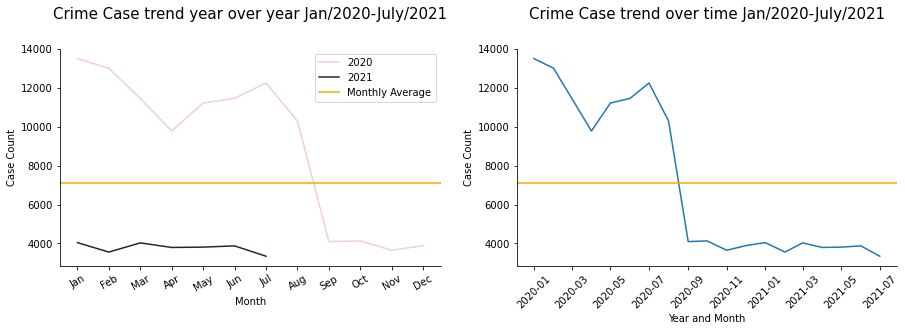

In [67]:
# create two plot to show trend of 1. year over year ; 2. over the two years

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
linechart1 = sns.lineplot(data =df_count_month, x = 'month', y = 'case_count',hue = 'year')

linechart1.axhline(monthly_average, label ='Monthly Average', color = 'Orange')
linechart1.set(xlabel ='Month', ylabel ='Case Count')
linechart1.set_xticks(range(1,13))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
linechart1.set_xticklabels(months, rotation = 30,size = 10)
plt.legend(loc='upper right')
plt.title('Crime Case trend year over year Jan/2020-July/2021', size = 15, pad = 30)
linechart1.spines['top'].set_visible(False)
linechart1.spines['right'].set_visible(False)


plt.subplot(1, 2, 2)
linechart2 = sns.lineplot(data =df_count_month, x = 'year_month', y = 'case_count')
linechart2.axhline(monthly_average, label ='Monthly Average', color = 'orange')
plt.ylabel('Case Count')
plt.xlabel('Year and Month')
plt.xticks(rotation=45)
plt.title('Crime Case trend over time Jan/2020-July/2021', size = 15, pad = 30)
linechart2.spines['top'].set_visible(False)
linechart2.spines['right'].set_visible(False)



2. Crime reports by type and hours - when crime mostly reported

In [79]:
df_type_count = df[['case_number','parent_incident_type','final_disposition','incident_date','incident_time']]
df_type_count['incident_hour'] = df_type_count['incident_time'].dt.strftime('%H')
df_type_count['incident_hour'] = pd.to_numeric(df_type_count['incident_hour'])
df_type_count = df_type_count[['case_number', 'parent_incident_type','final_disposition','incident_date','incident_hour' ]]
df_type_count.head()

<ipython-input-79-025916168d4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type_count['incident_hour'] = df_type_count['incident_time'].dt.strftime('%H')
<ipython-input-79-025916168d4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_type_count['incident_hour'] = pd.to_numeric(df_type_count['incident_hour'])


,case_number,parent_incident_type,final_disposition,incident_date,incident_hour
0,S212090045,Other,N,2021-07-28,5
1,S212090044,Burglary,N,2021-07-28,4
2,S212090042,Alarm,N,2021-07-28,4
3,S212090031,Other,N,2021-07-28,2
4,S212090029,Disorder,N,2021-07-28,2


In [136]:
print(max(df_type_count.incident_hour.unique()))

23


In [82]:
# other is one of the parent_incident_type should be sum with Other
df_type_count.loc[df_type_count.parent_incident_type == 'other','parent_incident_type'] ='Other'
print(df_type_count['parent_incident_type'].unique())

['Other' 'Burglary' 'Alarm' 'Disorder' 'Community Policing'
 'Weapons Offense' 'Property Crime' 'Traffic' 'Vehicle Theft' 'Assault'
 'Theft' 'Missing Person' 'Other Sexual Offense' 'Vehicle Recovery'
 'Vehicle Burglary' 'Narcotics' 'Assault w/ Deadly Weapon' 'Robbery'
 'Arson' 'Death' 'Family Offense' 'Liquor' 'Proactive Policing - Vehi'
 'Proactive Policing - Pede']


In [222]:
df_type_count_hour = df_type_count.groupby(['parent_incident_type'
                                            ,'final_disposition'
                                            , 'incident_date'
                                            , 'incident_hour']).count().reset_index()
df_type_count_hour = df_type_count_hour.rename(columns = {'case_number': 'case_count'})
df_type_count_hour = df_type_count_hour.sort_values(by='case_count', ascending = False)
df_type_count_hour['incident_month'] = pd.DatetimeIndex(df_type_count_hour['incident_date']).month
df_type_count_hour['incident_day'] = pd.DatetimeIndex(df_type_count_hour['incident_date']).day
df_type_count_hour.head()

,parent_incident_type,final_disposition,incident_date,incident_hour,case_count,incident_month,incident_day
30029,Disorder,IN,2021-07-04,21,41,7,4
29468,Disorder,IN,2020-07-04,21,41,7,4
19539,Community Policing,N,2020-07-23,10,30,7,23
70295,Proactive Policing - Vehi,T,2020-02-06,9,22,2,6
29147,Disorder,DU,2021-07-04,21,21,7,4


In [213]:
# double check to see if number of count is correct
df_type_count[(df_type_count.parent_incident_type == 'Disorder') 
              & (df_type_count.final_disposition == 'IN') 
              & (df_type_count.incident_date== '2021-07-04')
              &(df_type_count.incident_hour == 21)].case_number.count()


41

In [225]:
df_count_hour = df_type_count_hour.groupby(['incident_hour', 'incident_month','incident_day']).count().reset_index()
df_count_hour.head()

,incident_hour,incident_month,incident_day,parent_incident_type,final_disposition,incident_date,case_count
0,0,1,1,16,16,16,16
1,0,1,2,6,6,6,6
2,0,1,3,13,13,13,13
3,0,1,4,11,11,11,11
4,0,1,5,10,10,10,10


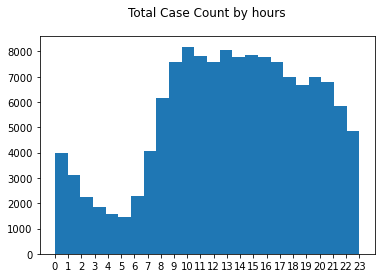

In [252]:
plt.hist(df_type_count['incident_hour'], bins = 24)
plt.xticks(range(0,24))
plt.title('Total Case Count by hours', pad = 20)
plt.show()

In [144]:
df_type_group = df_type_count.groupby(['parent_incident_type'])['case_number'].count().reset_index()
df_type_group= df_type_count.rename(columns ={'case_number':'case_count'})
df_type_group = df_type_group.sort_values(by ='case_count', ascending=False,ignore_index = True)
df_type_group.head()

,case_count,parent_incident_type,final_disposition,incident_date,incident_hour
0,S212090045,Other,N,2021-07-28,5
1,S212090044,Burglary,N,2021-07-28,4
2,S212090042,Alarm,N,2021-07-28,4
3,S212090031,Other,N,2021-07-28,2
4,S212090029,Disorder,N,2021-07-28,2


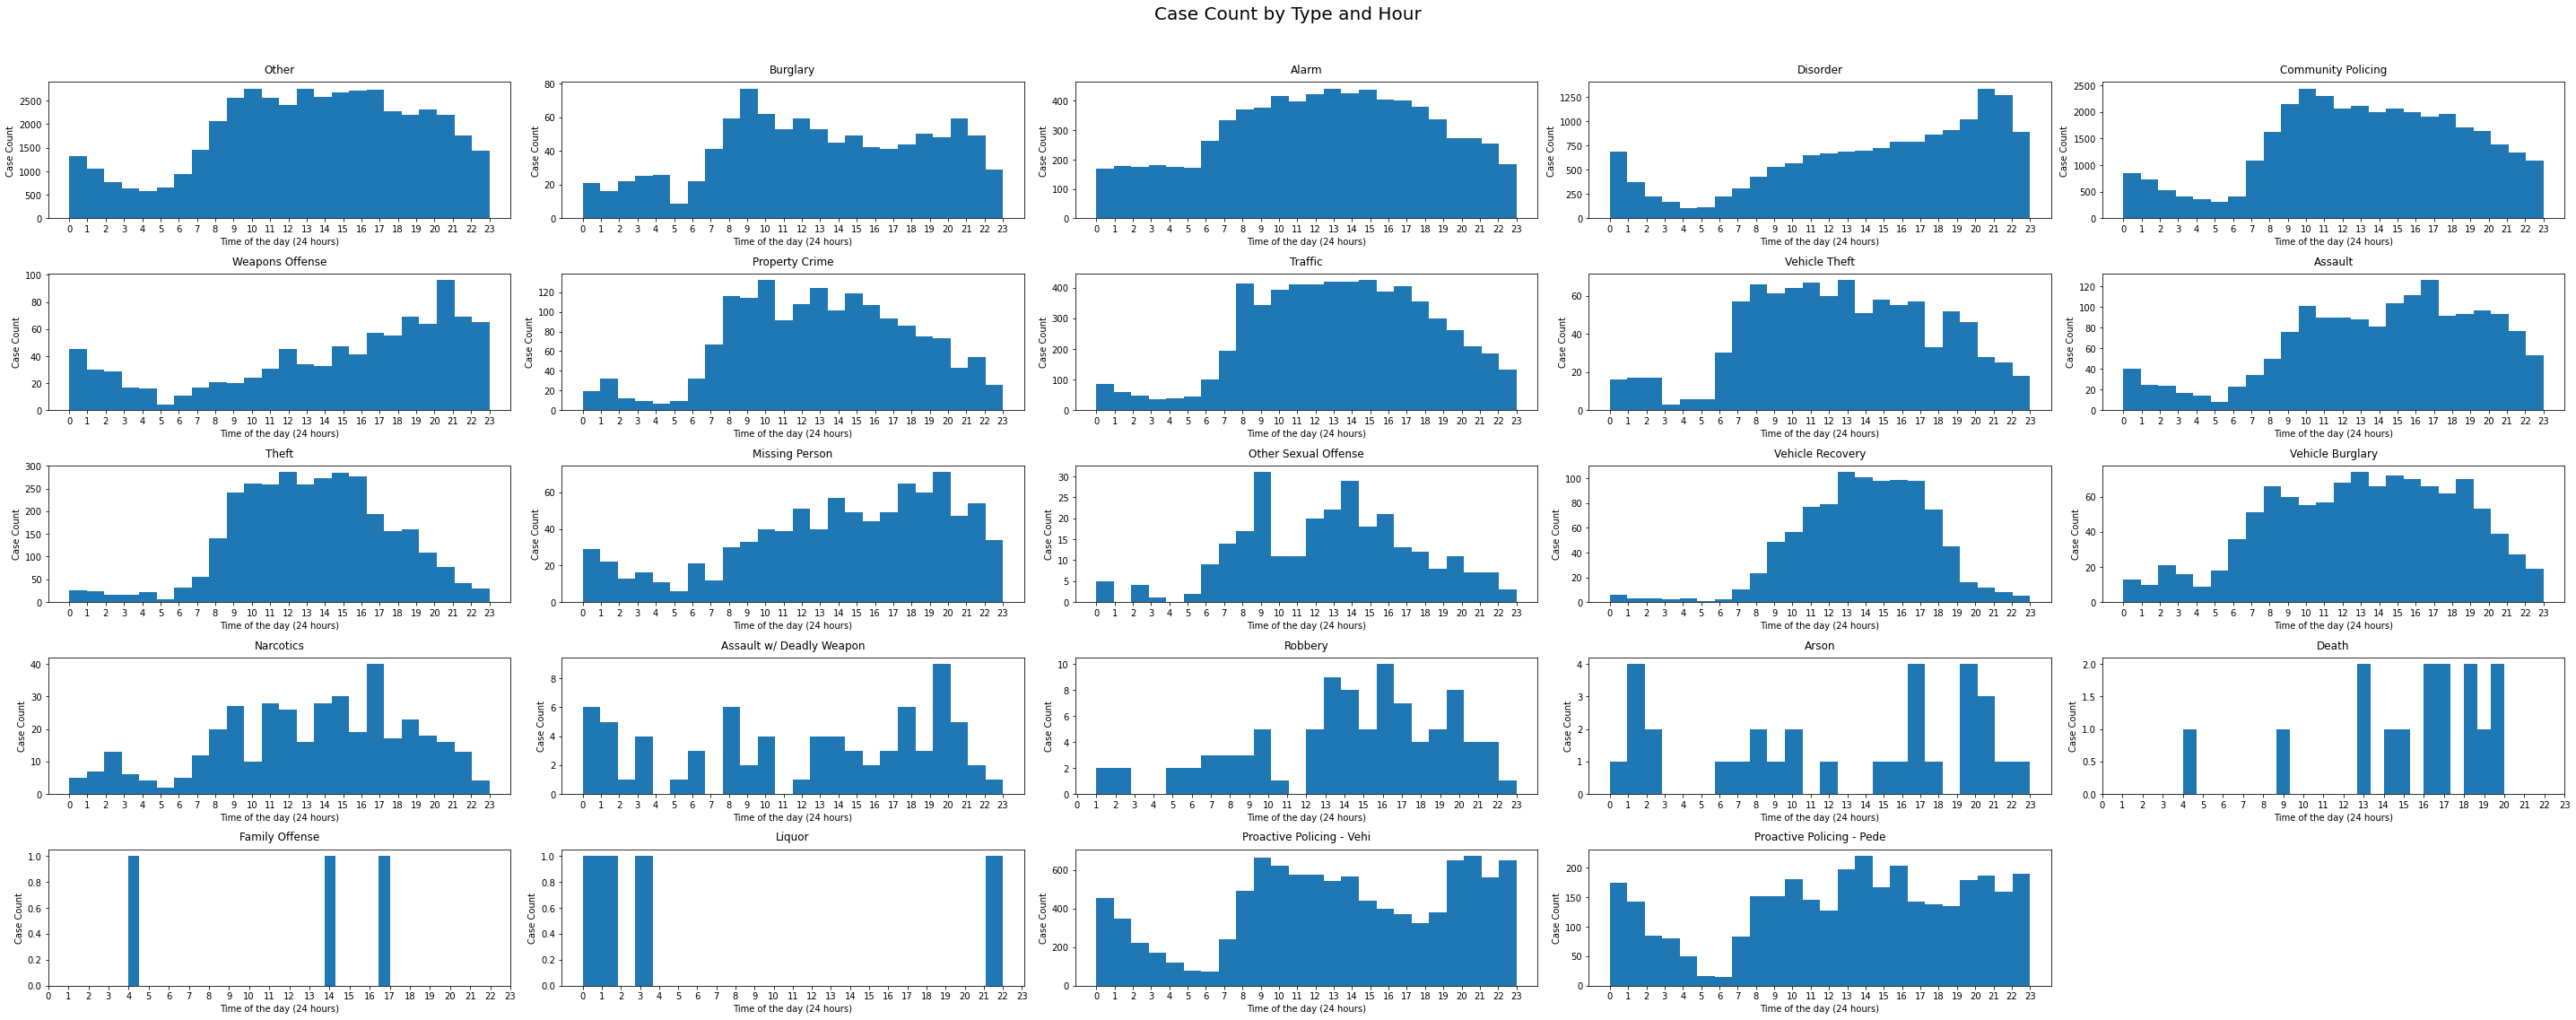

In [96]:
# use the sorted list by cased count
incident_type = list(df_type_group['parent_incident_type'].unique())
plt.figure(figsize = (40,15))
plt.subplots_adjust()

plt.suptitle('Case Count by Type and Hour', size =20, y=1.05)

#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

for i, type in enumerate(incident_type):
    plt.subplot(5, 5, i+1)
    df_hist = df_type_group[df_type_group['parent_incident_type'] == type]
    plt.hist(df_hist['incident_hour'], bins = 24)
    plt.xticks(range(0,24))
    plt.xlabel('Time of the day (24 hours)')
    plt.ylabel ('Case Count')
    plt.title(type, pad = 10)
    
plt.tight_layout()
plt.show()
   

Develop a model to predict the crime reports at certain hours
* We will use a Random Forest Regression Model to make prediction of crime reports number based on the month, day and hour
* R^2 and MAE are used to quanity our model's performance

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [226]:
# split into train test sets
hours = df_count_hour[['incident_month','incident_day','incident_hour']]
cases = df_count_hour[['case_count']]
X_train, X_test, y_train, y_test = train_test_split(hours,cases,test_size=0.2,random_state=42)

In [210]:
# print(X_train)
# print(y_train)

In [227]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6852, 3) (1713, 3) (6852, 1) (1713, 1)


In [228]:
# fit the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

<ipython-input-228-80117ba81d64>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [229]:
# make predictions
yhat = model.predict(X_test)

In [230]:
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
r2= r2_score(y_test, yhat)
print('MAE: %.3f' % mae)
print('R^2: %.3f' % r2)

MAE: 2.254
R^2: 0.782


In [251]:
# entering new data [[month, day, hour]]
new_data = [[7,17,17],
            [6,6,12],
            [11,5,6]]
for i, case in enumerate(model.predict(new_data)):
    # predicted crime report counts on this day 7/17, this hour 17 is : 14.91
    print('Predicted Crime Report Counts at this day ' 
          + str(new_data[i][0])+ '/'+ str(new_data[i][1])
          +', during hour '+ str(new_data[i][2]) + '-'+ str(new_data[i][2] +1) +' is: ' + str(int(round(case))))

Predicted Crime Report Counts at this day 7/17, during hour 17-18 is: 15
Predicted Crime Report Counts at this day 6/6, during hour 12-13 is: 16
Predicted Crime Report Counts at this day 11/5, during hour 6-7 is: 1


Conclusions:
1. Overall trend for the number of crime reports is going down since 2020.
2. Different type of crime reports have different distribution over the day. For total cases of all types, the number of crime reports goes up starts from 5-6 in the morning and flutuates a little and starts going down from 8-9 in the evening.
3. The regression model we built is 78% acurate. There is a lot room to improve the accuracy by introducing more variables, for instance, the type of the crime report, etc,, which we will cover in future project.